<style>
h1 {
  color: #0078d4
}
</style>
<h1>Text Mining & NLP
</h1>

<p>
    Sentiment analysis is a fundamental application of text mining and natural language processing (NLP) that involves determining whether a given piece of text conveys a positive, negative, or neutral sentiment. Various techniques can be applied to perform sentiment analysis. This assignment, will have a focus on approaches using TF-IDF, Bag of Words (BOW), and word embeddings.
</p>
<p>
    I will be using the <strong>sentiment140 (training)</strong> dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets have been annotated (<strong>0 = negative, 4 = positive</strong>), and they can be used to detect sentiment. Sentiment140 contains the following 6 fields:
</p>
<ol>
    <li><strong>target:</strong> the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)</li>
    <li><strong>ids:</strong> The id of the tweet (2087)</li>
    <li><strong>date:</strong> the date of the tweet (Sat May 16 23:58:44 UTC 2009)</li>
    <li><strong>flag:</strong> The query (lyx). If there is no query, then this value is NO_QUERY.</li>
    <li><strong>user:</strong> the user that tweeted (robotickilldozr)</li>
    <li><strong>text:</strong> the text of the tweet (Lyx is cool)</li>
</ol>

Questions:
1. Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)
2. Build a BOW and train a KNN, Decision Tree, and SVM model
3. Evaluate the above models (confusion matrix, accuracy, classification report, etc.)
4. Select one of the word embedding methods (Word2Vec, GloVe, or FastText), build a
CNN model, and compare its results with those obtained in Question 2.
5. Build an API or a user interface to use the trained CNN model in production (this
question is optional)

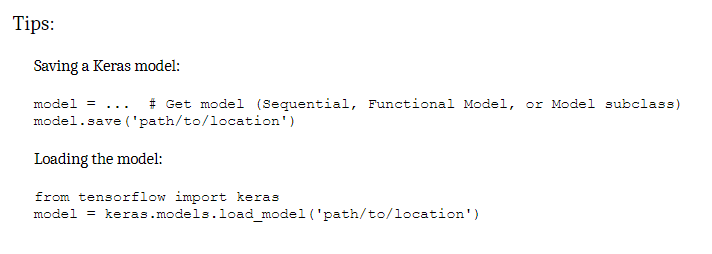

<style>
    h3 {
        color: #0078d4
    }
</style>
<h3>1. Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)</h3>

In [ ]:
#it is used for encoding as the file is using utf-8 encoding
pip install chardet


Note: you may need to restart the kernel to use updated packages.


<style>
    h4 {
        color: #d4007c
    }
</style>
<h4>Merging columns</h4>

As I noticed that test data is very small in comparison to the train data, I decided to merge those 2 files. At some later stage, I will split them in the rate that is better.

In [13]:
import pandas as pd

#adding column names that will be saved as column names for the df
column_names=['Target', 'Ids', 'Date', 'Flag', 'User', 'Text']

#leading files
train_data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=column_names, header=None)
test_data = pd.read_csv('testdata.manual.2009.06.14.csv', encoding='latin-1', names=column_names, header=None)

#merging those 2 files into 1
df=pd.concat([train_data, test_data], ignore_index=True)



In [14]:
df.head()

,Target,Ids,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
print(df.shape)

(1600498, 6)
